In [11]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
sv1849 = [283, 157, 192, 249, 259, 226, 352, 97, 111, 8, 235, 92]
lsv1849 = [256, 267, 312, 257, 318, 446, 143, 193, 243, 215, 544, 187, 153, 81, 113, 176]
sv1854 = [371, 161, 148, 362, 244, 237, 282, 59, 171, 9, 240, 174]
lsv1854 = [113, 174, 270, 93, 210, 388, 92, 58, 117, 49, 193, 303, 142, 48, 165, 132]

sv_death = sv1849 + sv1854
lsv_death = lsv1849 + lsv1854


In [6]:
sv_area = ["sv_" + str(i) for i in range(1, len(sv1849)+1)] + ["sv_" + str(i) for i in range(1, len(sv1854)+1)]
lsv_area = ["lsv_" + str(i) for i in range(1, len(lsv1849)+1)] + ["lsv_" + str(i) for i in range(1, len(lsv1854)+1)]


In [8]:
sv_area = ["sv_" + str(i) for i in range(1, len(sv1849) + 1)] + ["sv_" + str(i) for i in range(1, len(sv1854) + 1)]
lsv_area = ["lsv_" + str(i) for i in range(1, len(lsv1849) + 1)] + ["lsv_" + str(i) for i in range(1, len(lsv1854) + 1)]
sv_year = ["1849"] * len(sv1849) + ["1854"] * len(sv1854)
lsv_year = ["1849"] * len(lsv1849) + ["1854"] * len(lsv1854)

sv = pd.DataFrame({
        "area": sv_area,
        "year": sv_year,
        "death": sv_death,
        "LSV": ["0"] * len(sv_area),
        "company": ["Southwark and Vauxhall"] * len(sv_area)
    })

lsv = pd.DataFrame({
        "area": lsv_area,
        "year": lsv_year,
        "death": lsv_death,
        "LSV": ["1"] * len(lsv_area),
        "company": ["Lambeth & Southwark and Vauxhall"] * len(lsv_area)
    })


In [40]:
JS_df = pd.concat([sv, lsv])
JS_df["LSV"] = np.where(JS_df["company"] == "Lambeth & Southwark and Vauxhall", 1, 0)
JS_df

,area,year,death,LSV,company
0,sv_1,1849,283,0,Southwark and Vauxhall
1,sv_2,1849,157,0,Southwark and Vauxhall
2,sv_3,1849,192,0,Southwark and Vauxhall
3,sv_4,1849,249,0,Southwark and Vauxhall
4,sv_5,1849,259,0,Southwark and Vauxhall
5,sv_6,1849,226,0,Southwark and Vauxhall
6,sv_7,1849,352,0,Southwark and Vauxhall
7,sv_8,1849,97,0,Southwark and Vauxhall
8,sv_9,1849,111,0,Southwark and Vauxhall
9,sv_10,1849,8,0,Southwark and Vauxhall


In [14]:
JS_sum = JS_df.groupby(["company", "LSV", "year"]).agg({"death": "sum"}).reset_index()


In [15]:
JS_grp_summary = JS_sum.copy()
JS_grp_summary["year"] = JS_grp_summary["year"].apply(lambda x: f"year_{x}")
JS_grp_summary = JS_grp_summary.pivot(index=["company", "LSV"], columns="year", values="death").reset_index()
JS_grp_summary["gap"] = JS_grp_summary["year_1854"] - JS_grp_summary["year_1849"]
JS_grp_summary["gap_rate"] = JS_grp_summary["year_1854"] / JS_grp_summary["year_1849"] - 1


In [16]:
JS_grp_summary

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,3904,2547,-1357,-0.347592
1,Southwark and Vauxhall,0,2261,2458,197,0.087130


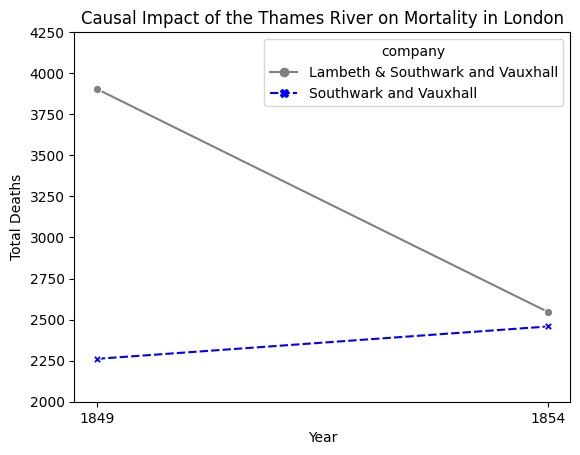

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

did_plot = sns.lineplot(x="year", y="death", hue="company", data=JS_sum,
                        markers=True, style="company", palette=["gray", "blue"])

did_plot.set(ylim=(2000, 4250))
did_plot.set_title("Causal Impact of the Thames River on Mortality in London")
did_plot.set_xlabel("Year")
did_plot.set_ylabel("Total Deaths")

plt.show()


## 4サンプルのみの場合

In [45]:
import pandas as pd
import statsmodels.formula.api as smf

JS_sum['D1854'] = np.where(JS_sum['year'] == '1854', 1, 0)
JS_sum['LSV_D1854_confounding'] = JS_sum['D1854']*JS_sum['LSV'] 
JS_sum

# define your independent and dependent variables
X = JS_sum[['LSV', 'D1854', 'LSV_D1854_confounding','year']]
X = pd.get_dummies(X, drop_first=True)

Y = JS_sum['death']

# add an intercept to the independent variables
X = sm.add_constant(X)

# create a linear regression model and fit it to the data
model = sm.OLS(Y, X).fit()

# print the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 06 Apr 2023   Prob (F-statistic):                nan
Time:                        22:26:33   Log-Likelihood:                 102.95
No. Observations:                   4   AIC:                            -197.9
Df Residuals:                       0   BIC:                            -200.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2261.00

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


## 地域ごとの集計の場合

In [39]:
JS_df['D1854'] = np.where(JS_df['year'] == '1854', 1, 0)

JS_df['LSV_D1854_confounding'] = JS_df['D1854']*JS_df['LSV'] 
JS_df

# define your independent and dependent variables
X = JS_df[['LSV', 'D1854', 'LSV_D1854_confounding','area']]
X = pd.get_dummies(X, drop_first=True)

Y = JS_df['death']

# add an intercept to the independent variables
X = sm.add_constant(X)

# create a linear regression model and fit it to the data
model = sm.OLS(Y, X).fit()

# print the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     4.881
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           5.45e-05
Time:                        17:54:04   Log-Likelihood:                -289.21
No. Observations:                  56   AIC:                             638.4
Df Residuals:                      26   BIC:                             699.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   177.70